# Santander Customer Satisfaction

This project comprises of predicting customer satisfaction. By predicting their satisfaction, organization can take actions to improve their relationship with unhappy customers as well as identify areas and services that require more attention.

In this case, Santander Bank needs aid to identify those unhappy customers so they can target them to provide a better customer experience. A minimum of 70% accuracy has been set.

An anonimized dataset has been provided by the bank and will be used for this analysis. More information about it can be found on Kaggle. (https://www.kaggle.com/c/santander-customer-satisfaction)

In [1]:
# Import packages
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load data
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [3]:
# Check the number of registers and features
print("Train shape with Id : {} ".format(train_data.shape))
print("Test shape with Id : {} ".format(test_data.shape))

id_name='ID'

# Save the 'Id' column
train_ID = train_data[id_name]
test_ID = test_data[id_name]

# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train_data.drop(id_name, axis = 1, inplace = True)
test_data.drop(id_name, axis = 1, inplace = True)

# check again the data size after dropping the 'Id' variable
print("\nTrain shape without Id : {} ".format(train_data.shape)) 
print("Test shape without Id : {} ".format(test_data.shape))

Train shape with Id : (76020, 371) 
Test shape with Id : (75818, 370) 

Train shape without Id : (76020, 370) 
Test shape without Id : (75818, 369) 


In [4]:
output = 'TARGET'
source = 'Source'

y_train = train_data[output]
features = train_data.columns.tolist()
features.remove(output)

train_data[source]='Train'
test_data[source]='Test'

In [5]:
# Obtain an overview of the variables 
#import pandas_profiling as pf
#pf.ProfileReport(train_data)

In [6]:
train_data.head().append(train_data.tail())

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,Source
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0,Train
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0,Train
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0,Train
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0,Train
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,Train
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0,Train
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0,Train
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0,Train
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0,Train
76019,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0,Train


In [7]:
test_data.head().append(test_data.tail())

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,Source
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000,Test
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000,Test
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000,Test
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000,Test
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000,Test
75813,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000,Test
75814,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000,Test
75815,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000,Test
75816,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,Test
75817,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,Test


# Missing Analysis

In [8]:
def check_missing(dataset, display = 5):
    temp_df = dataset.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    missing_data = pd.DataFrame({'Missing n':temp_df.isnull().sum(),'% Missing' :df_nan})
    return missing_data.sort_values('% Missing', ascending=False).head(display)

In [9]:
check_missing(train_data)

,% Missing,Missing n
var3,0.0,0
imp_trasp_var17_out_hace3,0.0,0
ind_var7_recib_ult1,0.0,0
ind_var7_emit_ult1,0.0,0
imp_venta_var44_ult1,0.0,0


In [10]:
train_data.dtypes

var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0                         int64
ind_var5        

Class 0: 73012 (96.04%)
Class 1: 3008 (3.96%)


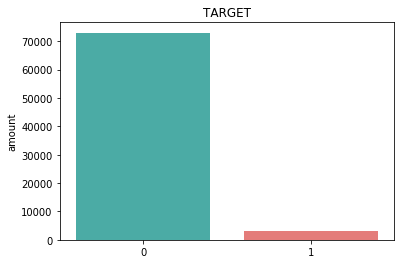

In [11]:
def check_output(dataset, output):
    amount = dataset[output].value_counts()
    ratio =  dataset[output].value_counts(normalize=True)*100
    print('Class 0: {} ({}%)'.format(amount[0], round(ratio[0],2)))
    print('Class 1: {} ({}%)'.format(amount[1], round(ratio[1],2)))

    labels = ['1' if label == 1 else '0' for label in dataset[output]]
    palette = {'1': '#f56b69', '0': '#3bbbb3'}

    ax = sns.countplot(labels, palette=palette)
    plt.title(output)
    plt.ylabel('amount')
    return plt.show()

check_output(train_data, 'TARGET')

In [12]:
# Identify the columns which have constant values and remove them from the dataset
constant_columns_name = train_data.columns[train_data.nunique() == 1].tolist()

train_data.drop(constant_columns_name, axis = 1, inplace = True)
test_data.drop(constant_columns_name, axis = 1, inplace = True)


# def drop_constant_column(dataset):
#     return dataset.loc[:, (dataset != dataset.iloc[0]).any()]

# drop_constant_column(train_data)

There are some columns that have only one value and therefore will not contribute to the analysis and will be discarded. These are:

'ind_var2_0',
 'ind_var2',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var28',
 'saldo_var27',
 'saldo_var41',
 'saldo_var46',
 'imp_amort_var18_hace3',
 'imp_amort_var34_hace3',
 'imp_reemb_var13_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3',
 'Source'

In [13]:
from collections import Counter
# Outlier detection 
def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than n outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v >= n )
    return multiple_outliers 

In [14]:
train_data.describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


# Var3

Var3 seems to be a categorical value. The value -999999, which is quite different from the other may mean that the information is not available. I will replace them for the most common value, 2.

In [15]:
print('Var3 has {} distinct values.\n'.format(train_data['var3'].nunique()))
print('The following numbers appears more often: \n{}\n'. format(train_data['var3'].value_counts()[:10]))
print(train_data['var3'].describe())

Var3 has 208 distinct values.

The following numbers appears more often: 
 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

count     76020.000000
mean      -1523.199277
std       39033.462364
min     -999999.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         238.000000
Name: var3, dtype: float64


In [16]:
train_data['var3'].replace(-999999, 2, inplace = True)

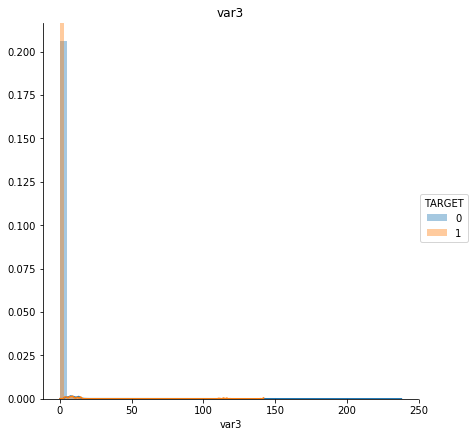

In [17]:
sns.FacetGrid(train_data, hue="TARGET", size=6) \
   .map(sns.distplot, "var3") \
   .add_legend()
plt.title('var3');

# var15

This variable contains 100 unique integer values, whose distribution seems to represent the age of the customer.
The density plot shows that unhappy customers tend to be a bit older, around 25-45 yo.

In [18]:
print('Var15 has {} distinct values.\n'.format(train_data['var15'].nunique()))
print('The following numbers appears more often: \n{}\n'. format(train_data['var15'].value_counts()[:10]))
print(train_data['var15'].describe())

Var15 has 100 distinct values.

The following numbers appears more often: 
23    20170
24     6232
25     4217
26     3270
27     2861
28     2173
31     1798
29     1727
30     1640
32     1592
Name: var15, dtype: int64

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64


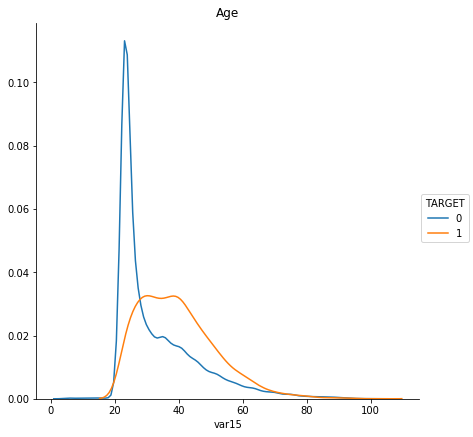

In [19]:
# Let's look at the density of the age of happy/unhappy customers
sns.FacetGrid(train_data, hue = "TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('Age');

# var21

In [20]:
print('Var21 has {} distinct values.\n'.format(train_data['var21'].nunique()))
print('The following numbers appears more often: \n{}\n'. format(train_data['var21'].value_counts()))
print(train_data['var21'].describe())

Var21 has 24 distinct values.

The following numbers appears more often: 
0        75152
900        236
1800       206
4500        96
3000        84
7200        62
3600        52
1500        31
6000        27
2700        26
9000        14
1200        12
5400         4
2400         3
18000        2
3300         2
4200         2
5100         2
2100         2
7500         1
6600         1
5700         1
10500        1
30000        1
Name: var21, dtype: int64

count    76020.000000
mean        32.549329
std        393.834939
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      30000.000000
Name: var21, dtype: float64


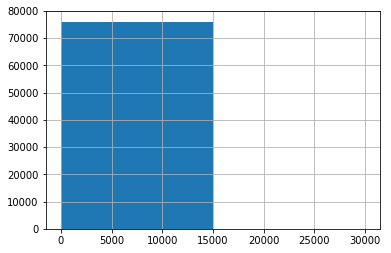

In [21]:
train_data.var21.hist(bins=2)

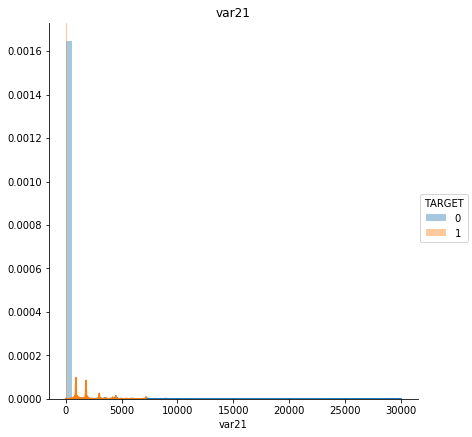

In [22]:
# Countplot of variable var21
sns.FacetGrid(train_data, hue = "TARGET", size=6) \
   .map(sns.distplot, "var21") \
   .add_legend()
plt.title('var21');

# var36

In [23]:
print('Var36 has {} distinct values.\n'.format(train_data['var36'].nunique()))
print('The following numbers appears more often: \n{}\n'. format(train_data['var36'].value_counts()))
print(train_data['var36'].describe())

Var36 has 5 distinct values.

The following numbers appears more often: 
99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

count    76020.000000
mean        40.449079
std         47.362719
min          0.000000
25%          2.000000
50%          3.000000
75%         99.000000
max         99.000000
Name: var36, dtype: float64


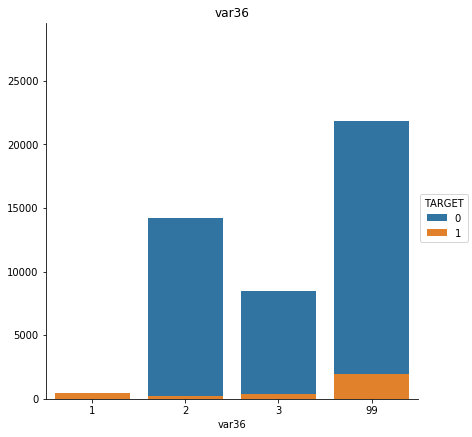

In [24]:
# Countplot of variable var21
sns.FacetGrid(train_data, hue = "TARGET", size=6) \
   .map(sns.countplot, "var36") \
   .add_legend()
plt.title('var36');

# var38

This variable contains a large number of unique float values varying from 5,163 up to 22,034,740.
Noteably there are 14868 registers with the value 117310.979016. In comparison, the second most common value appears only 16 times.

In [25]:
print('Var38 has {} distinct values.\n'.format(train_data['var38'].nunique()))
print('The following numbers appears more often: \n{}\n'. format(train_data['var38'].value_counts()))
print(train_data['var38'].describe())

Var38 has 57736 distinct values.

The following numbers appears more often: 
117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
236690.340000        8
329603.970000        7
104644.410000        7
67088.310000         7
125722.440000        7
128318.520000        7
97639.560000         6
100466.730000        6
70813.800000         6
163432.470000        6
168733.620000        6
105260.880000        6
185385.690000        6
85814.040000         5
235476.720000        5
121603.020000        5
93037.680000         5
63820.890000         5
33184.020000         5
126065.040000        5
71302.530000         5
208961.790000        5
171932.700000        5
131353.470000        5
127141.500000        5
                 ...  
59680.710000         1
46170.180000         1
75729.810000         1
92730.750000         1
98087.700000         1
31312.410000         1
151944.720000        1
49222.200000         1
46682.640000         1
797

In [26]:
# The most common value is very close to the mean of the other values
train_data.var38[train_data['var38'] != 117310.979016494].describe()

count    6.115200e+04
mean     1.172175e+05
std      2.036637e+05
min      5.163750e+03
25%      6.167002e+04
50%      8.890194e+04
75%      1.324922e+05
max      2.203474e+07
Name: var38, dtype: float64

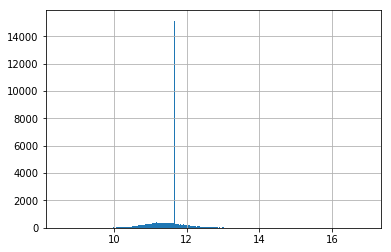

In [27]:
# The visualization of log(var38) shows the effects of that 117310 on the distribution
train_data.var38.map(np.log).hist(bins=1000)

In [28]:
# I will create a dummy variable to identify the registers that have or haven't 117310 as value.
train_data['var38_b'] = 0
train_data.var38_b[train_data['var38'] == 117310.979016494] = 1

test_data['var38_b'] = 0
test_data.var38_b[test_data['var38'] == 117310.979016494] = 1

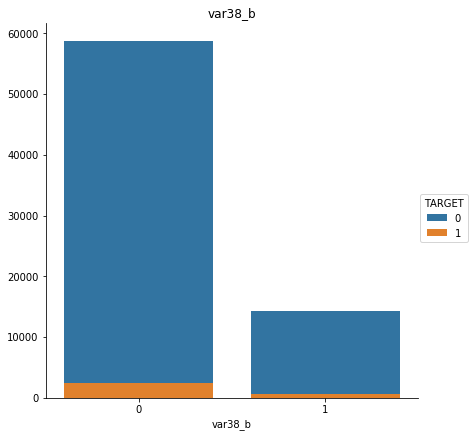

In [29]:
# Countplot of variable var38_b
sns.FacetGrid(train_data, hue = "TARGET", size=6) \
   .map(sns.countplot, "var38_b") \
   .add_legend()
plt.title('var38_b');

# Creating new variable

There are many registers with zero. This variable will count how many there are.

In [30]:
X = train_data.iloc[:,:-1]
y = train_data.TARGET

X['n0'] = (X == 0).sum(axis = 1)
train_data['n0'] = X['n0']

X = test_data.iloc[:,:-1]

X['n0'] = (X == 0).sum(axis = 1)
test_data['n0'] = X['n0']

# Feature Selection

In [31]:
features = train_data.columns.tolist()
features.remove(output)

X_train = train_data[features]
y_train = train_data[output]

X_valid = test_data[features]
#y_test = test_data[output]


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = features)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns = features)

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train_scaled, y_train)


In [34]:
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(clf.feature_importances_)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_scaled.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], clf.feature_importances_[indices[f]]))
#    print("{}.   {}   ({})"  .format(f + 1, X_train_scaled.columns[indices[f]], clf.feature_importances_[indices[f]]))

Feature ranking:
1. feature 336 (0.491253)
2. feature 1 (0.054002)
3. feature 294 (0.035261)
4. feature 334 (0.028813)
5. feature 292 (0.025939)
6. feature 291 (0.020102)
7. feature 249 (0.018937)
8. feature 293 (0.014554)
9. feature 298 (0.013281)
10. feature 251 (0.012514)
11. feature 247 (0.012021)
12. feature 246 (0.011732)
13. feature 296 (0.011459)
14. feature 295 (0.010867)
15. feature 164 (0.009706)
16. feature 171 (0.009480)
17. feature 252 (0.009204)
18. feature 297 (0.009188)
19. feature 148 (0.008974)
20. feature 248 (0.008523)
21. feature 173 (0.008390)
22. feature 261 (0.007445)
23. feature 250 (0.006358)
24. feature 57 (0.005401)
25. feature 335 (0.005317)
26. feature 22 (0.005059)
27. feature 17 (0.003395)
28. feature 13 (0.003364)
29. feature 16 (0.003243)
30. feature 245 (0.003185)
31. feature 11 (0.003118)
32. feature 2 (0.003114)
33. feature 14 (0.003091)
34. feature 4 (0.002998)
35. feature 121 (0.002981)
36. feature 270 (0.002971)
37. feature 12 (0.002948)
38. fea

307. feature 195 (0.000000)
308. feature 55 (0.000000)
309. feature 94 (0.000000)
310. feature 101 (0.000000)
311. feature 111 (0.000000)
312. feature 257 (0.000000)
313. feature 317 (0.000000)
314. feature 316 (0.000000)
315. feature 315 (0.000000)
316. feature 65 (0.000000)
317. feature 132 (0.000000)
318. feature 133 (0.000000)
319. feature 288 (0.000000)
320. feature 278 (0.000000)
321. feature 154 (0.000000)
322. feature 158 (0.000000)
323. feature 194 (0.000000)
324. feature 159 (0.000000)
325. feature 240 (0.000000)
326. feature 284 (0.000000)
327. feature 163 (0.000000)
328. feature 174 (0.000000)
329. feature 175 (0.000000)
330. feature 178 (0.000000)
331. feature 182 (0.000000)
332. feature 287 (0.000000)
333. feature 184 (0.000000)
334. feature 186 (0.000000)
335. feature 190 (0.000000)
336. feature 35 (0.000000)
337. feature 168 (0.000000)


In [35]:
new_features = X_train_scaled.columns[indices[:71]] #14
new_features
X_train_scaled_fs = X_train_scaled[new_features]
X_valid_scaled_fs = X_valid_scaled[new_features]

print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))

correlation = train_data.corr()
plt.figure(figsize = (14,14))

sns.heatmap(correlation, cbar = True, square = True, annot = True, fmt = '.2f', annot_kws = {'size': 15}, cmap = 'coolwarm')
plt.show()

sns.pairplot(data = train_data, hue = 'TARGET', diag_kind = 'kde', palette = {1: '#f56b69', 0: '#3bbbb3'})
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X_train_v0, X_test_v0, y_train_v0, y_test_v0 = train_test_split(X_train_scaled_fs, y_train, test_size = 0.2, random_state = 42)


In [38]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train_v0==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_v0==1)))

Before OverSampling, counts of label '0': 58415
Before OverSampling, counts of label '1': 2401


In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42, ratio = 1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train_v0, y_train_v0)


In [40]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm==0)))

After OverSampling, the shape of train_X: (116830, 71)
After OverSampling, the shape of train_y: (116830,) 

After OverSampling, counts of label '1': 58415
After OverSampling, counts of label '0': 58415


In [41]:
# try random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

clf = RandomForestClassifier(n_estimators = 200)
clf.fit(X_train_sm, y_train_sm)
# validation
y_pred = clf.predict(X_test_v0)
confusion_matrix(y_test_v0, y_pred)
accuracy_score(y_test_v0, y_pred)
roc_auc_score(y_test_v0, y_pred)

0.786244640325205

In [42]:
accuracy_score(y_test_v0, y_pred)

0.982175743225467

In [ ]:
y_pred_valid = clf.predict(X_valid_scaled_fs)

In [ ]:
submission = pd.DataFrame({"ID": test_ID, "TARGET": y_pred_valid})
submission.to_csv("rf_submission_v3.csv", index=False)

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale

# First select features based on chi2 and f_classif
p = 3

X_bin = Binarizer().fit_transform(scale(X))
selectChi2 = SelectPercentile(chi2, percentile=p).fit(X_bin, y)
selectF_classif = SelectPercentile(f_classif, percentile=p).fit(X, y)

chi2_selected = selectChi2.get_support()
chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]
print('Chi2 selected {} features {}.'.format(chi2_selected.sum(),
   chi2_selected_features))
f_classif_selected = selectF_classif.get_support()
f_classif_selected_features = [ f for i,f in enumerate(X.columns) if f_classif_selected[i]]
print('F_classif selected {} features {}.'.format(f_classif_selected.sum(),
   f_classif_selected_features))
selected = chi2_selected & f_classif_selected
print('Chi2 & F_classif selected {} features'.format(selected.sum()))
features = [ f for f,s in zip(X.columns, selected) if s]
print (features)

In [ ]:
X_bin.shape

In [ ]:
# Make a dataframe with the selected features and the target variable
X_sel = train_data[features+['TARGET']]

In [ ]:
cor_mat = X_sel.corr()

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat,linewidths=.5, ax=ax);

In [ ]:

# only important correlations and not auto-correlations
threshold = 0.7
important_corrs = (cor_mat[abs(cor_mat) > threshold][cor_mat != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs